# Python for Neuroscientists Week 9 - Navigating Packages + Data Science

## Warmup: loading data
We'll be using the same SST dataset that we used two classes ago. Please load in this dataset. If you don't remember how to do this ... google it :)

Also just a reminder that you may have to import a few packages to make this work. This is also up to you to figure out.

<details>
<summary>Click here for a hint!</summary>
https://www.w3schools.com/python/pandas/pandas_csv.asp <br>
</details>

In [1]:
#Load in the SST dataset here
import pandas as pd
df = pd.read_csv('SST_data2.csv')

## Running statistical testing in Python
Let's start with an easy problem. Say I want to compare pupil area between familiar and novel trials - let's begin by selecting a sample of each. 

In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style('ticks')
sns.set_context('talk')

In [16]:
familiar_sample = df[df.exposure == 'familiar'].sample(15)
novel_sample = df[df.exposure == 'novel'].sample(15)
#here, we've taken samples of novel and familiar trials

In [17]:
sampled_data = pd.concat([familiar_sample, novel_sample])

<AxesSubplot:xlabel='exposure', ylabel='pupil_area'>

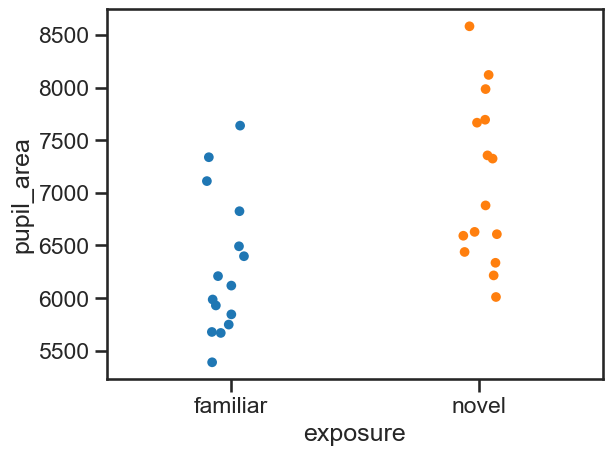

In [18]:
sns.stripplot(data = sampled_data, x = 'exposure', y = 'pupil_area', size = 7)

### Problem 1
Alright, time for a little challenge. You're going to figure out how to do stats in python. Well, to be specific, you're going to tell me what to do.

<details>
<summary>Click here for a hint!</summary>
Sorry, you don't get a hint, you're the instructor. ¯\(°_o)/¯ <br>
</details>

In [19]:
a = familiar_sample['pupil_area']
b = novel_sample['pupil_area']

In [7]:
print(b)

582103    7531.769140
527935    6409.476323
410756    5684.108556
412410    5243.049843
643876    7296.522473
679601    7739.229080
596488    7038.316813
586251    6996.237280
577704    6982.461290
429679    6800.887089
501058    6483.879367
616736    7487.642513
543789    6873.237951
444197    6438.177891
555026    7505.793393
Name: pupil_area, dtype: float64


In [14]:
stats.ttest_ind(a, b)


Ttest_indResult(statistic=-44.06217984358991, pvalue=6.658373868309641e-31)

### Problem 2
Your turn! Please run a one-way ANOVA on mean_response during omitted trials. I'll be such a great instructor and even set up your data for you.

As a bonus, please plot your data as well.

Google away! As a hint, you should be using scipy for this.

In [20]:
present_sample = df[df.omitted == False].sample(20)
omitted_sample = df[df.omitted == True].sample(20)

In [24]:
a = present_sample['mean_response']
b = novel_sample['mean_response']

In [25]:
stats.f_oneway(a,b)

F_onewayResult(statistic=5.0885083928189, pvalue=0.03083596192852599)

## Navigating a package

What if we want to run a linear regression, say on pupil_area vs. mean_response?

Let's take this opportunity to walk though sklearn in a little bit more detail.

<AxesSubplot:xlabel='pupil_area', ylabel='mean_response'>

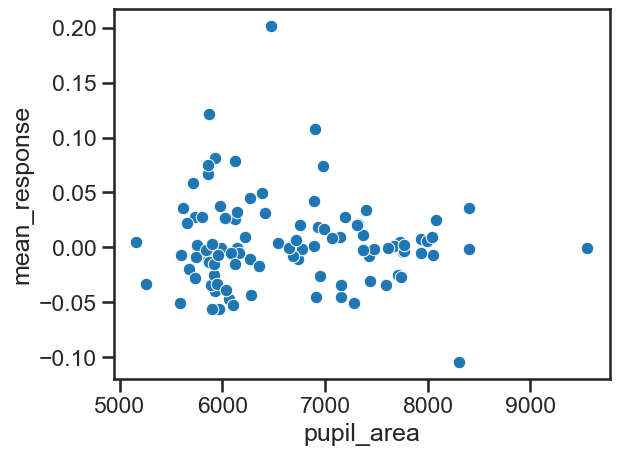

In [26]:
#Plot our data
df_sample = df.sample(100)
sns.scatterplot(data = df_sample, x = 'pupil_area', y = 'mean_response')

In [28]:
#arrange our data
X = df_sample['pupil_area'].dropna()
y = df.loc[X.index]['mean_response'].to_numpy().reshape(-1,1)
X = X.to_numpy().reshape(-1,1)

In [30]:
#import 
import numpy as np 
from sklearn.linear_model import LinearRegression

In [31]:
#run regression
reg = LinearRegression().fit(X, y)

In [37]:
#check results -- try this first, and then read doc
reg.intercept_
reg.coef_
reg.score(X,y)
reg.predict(np.array([[6000]]))


array([[0.00649348]])

### Builiding a simple classifier

In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [49]:
X = df['dF/F'].to_numpy().reshape(-1, 85)[0:4000]
y = df['omitted'].to_numpy().reshape(-1, 85)[0:4000, 0]

In [50]:
X.shape

(4000, 85)

In [51]:
y

array([False, False, False, ..., False, False, False])

In [52]:
X[0]

array([ 2.13396072e-01, -9.63331088e-02, -1.17811769e-01,  9.65261906e-02,
       -7.83426745e-04, -1.37827322e-02,  7.17468858e-02, -3.53431143e-02,
       -3.90817113e-02,  1.62086844e-01,  9.45661291e-02, -1.50754899e-01,
       -1.50797918e-01, -4.48021991e-03,  8.77930671e-02,  1.01849064e-02,
        1.15994275e-01,  1.02137297e-01, -3.73873785e-02, -5.95865166e-03,
       -5.14000142e-03, -1.50765553e-01,  1.44836435e-04, -1.05487220e-02,
        1.89509671e-02,  8.53352472e-02, -9.65348035e-02,  1.83418512e-01,
        2.69019753e-02, -3.66614908e-02, -7.23049650e-03,  1.51671410e-01,
        4.88334037e-02, -1.05623774e-01, -9.15780067e-02, -1.92563776e-02,
        2.10370589e-02,  1.52493060e-01,  1.22850109e-02,  1.26445189e-01,
        1.91839114e-02, -1.77768618e-02,  2.56553829e-01,  1.71815857e-01,
        0.00000000e+00, -5.59176132e-02,  5.65761328e-02,  7.05572963e-02,
       -8.04968849e-02, -3.85729373e-02,  1.02382548e-01,  1.19568430e-01,
        1.39150575e-01,  

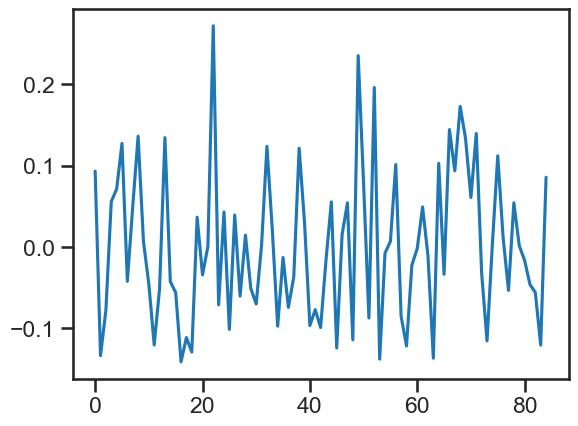

In [53]:
plt.plot(X[20])

In [54]:
#build a classifier
from sklearn import svm
clf = svm.SVC()


In [55]:
clf.fit(X, y)

SVC()

In [56]:
np.where(y)

(array([  60,   61,   62, ..., 3969, 3970, 3971], dtype=int64),)

In [66]:
y_test = df['omitted'].to_numpy().reshape(-1, 85)
np.where(y_test)

(array([  60,   60,   60, ..., 8105, 8105, 8105], dtype=int64),
 array([ 0,  1,  2, ..., 82, 83, 84], dtype=int64))

In [69]:
X = df['dF/F'].to_numpy().reshape(-1,85)


In [70]:
clf.predict([X[4]])

array([False])

In [74]:
clf.predict([X[8103]])

array([ True])

In [ ]:
Visualize your data
Figure out what you want to do and google it 
Shape your data into the appropriate format
Test that it did what you SSant